In [1]:
# Data Ingestion

In [2]:
import pandas as pd

In [5]:
csv_file_path = r'D:\ML Project\Machine-Learning\housing\artifact\data_ingestion\2022-07-03-08-54-34\raw_data\housing.csv'

In [7]:
housing_data_frame = pd.read_csv(csv_file_path)

In [8]:
housing_data_frame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [19]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Frequency'>

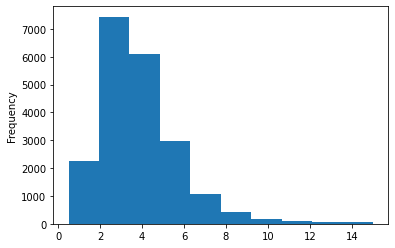

In [14]:
housing_data_frame["median_income"].plot(kind="hist")

In [15]:
import numpy as np

In [17]:
housing_data_frame["income_cat"] = pd.cut(
                housing_data_frame["median_income"],
                bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                labels=[1,2,3,4,5])

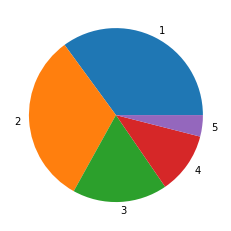

In [20]:
plt.pie(housing_data_frame["income_cat"].value_counts(),labels=[1,2,3,4,5])
plt.show()

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

In [24]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [25]:
for train_index,test_index in split.split(housing_data_frame, housing_data_frame["income_cat"]):
                print(train_index)
                print(test_index)

[12655 15502  2908 ... 19263 19140 19773]
[ 5241 17352  3505 ... 17223 10786  3965]


In [26]:
train_index

array([12655, 15502,  2908, ..., 19263, 19140, 19773], dtype=int64)

In [27]:
train_df = housing_data_frame.loc[train_index]

In [28]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [29]:
train_df.shape

(16512, 11)

In [30]:
housing_data_frame.shape

(20640, 11)

In [31]:
test_df = housing_data_frame.loc[test_index]

In [32]:
test_df.shape

(4128, 11)

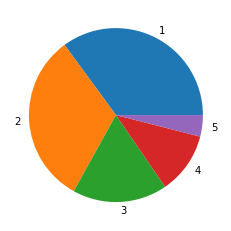

In [33]:
plt.pie(train_df["income_cat"].value_counts(),labels=[1,2,3,4,5])
plt.show()

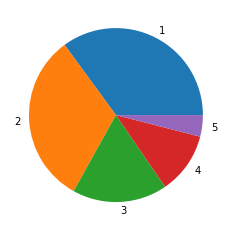

In [34]:
plt.pie(test_df["income_cat"].value_counts(),labels=[1,2,3,4,5])
plt.show()

In [35]:
housing_data_frame.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [42]:
housing_data_frame.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity         object
income_cat            category
dtype: object

In [45]:
housing_data_frame.dtypes.values

array([dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
       CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)],
      dtype=object)

In [47]:
data_type = list(map(lambda x:str(x).replace("dtype('","").replace("')",""), housing_data_frame.dtypes.values))

In [49]:
data_type

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'object',
 'category']

In [53]:
dict(zip(housing_data_frame.columns,data_type))

{'longitude': 'float64',
 'latitude': 'float64',
 'housing_median_age': 'float64',
 'total_rooms': 'float64',
 'total_bedrooms': 'float64',
 'population': 'float64',
 'households': 'float64',
 'median_income': 'float64',
 'median_house_value': 'float64',
 'ocean_proximity': 'object',
 'income_cat': 'category'}

In [56]:
housing_data_frame["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64